## Grafici

In [8]:
# for the dataset
import pandas as pd    
import numpy as np
import seaborn as sns

# general
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
import time

# for the tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# for the Random forest
from sklearn.ensemble import RandomForestClassifier

# for the SVM + packages for pipelines and scaling
from sklearn import svm
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# for the Gaussian
from sklearn.naive_bayes import GaussianNB

# for KNN
from sklearn.neighbors import KNeighborsClassifier

# to print more results and not just the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [9]:
#Dataset

# setting up labels for dataset
labels = ('class', 'spec_num', 'eccentr', 'asp_ratio', 'elong', 'solidity', 'stoch_conv', 'iso_factor', 'max_ind_depth', 'lobedness', 'av_intensity', 'av_contr', 'smooth', 'third_mom', 'unif', 'entropy')

# importing data
df = pd.read_csv(r'./leaf/leaf.csv', header = None, names = labels)

In [10]:
# for training and testing static division, if needed
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

### Single tree

In [11]:
# NON SERVE RUNNARE
# ho considerato i parametri riportati nell'ultima riga

#Grid Search - finding best estimators

# shuffling the dataframe + separating y from x + eliminating specimen number variable
df = df.sample(frac=1).reset_index()
df = df.iloc[:, 1:17]   # needed to eliminate the old indexes column
X = df.iloc[:, 2:16]
y = df.iloc[:, 0]

# griglia dei parametri su cui fare la ricerca
# for n-min in proglie c'è da 2 a 40, ma forse 40 è troppo alto visto che le osservazioni sono meno di 400
grid_param = {'criterion': ['gini', 'entropy'], 'min_samples_split': np.arange(2, 20)}

tree_cv = GridSearchCV(tree.DecisionTreeClassifier(), grid_param, cv=8, scoring='balanced_accuracy')
tree_cv.fit(X, y)
print(tree_cv.best_score_)
print(tree_cv.best_params_)
criterion = tree_cv.best_params_["criterion"]
min_samples_split = tree_cv.best_params_["min_samples_split"]

GridSearchCV(cv=8, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             scoring='balanced_accuracy')

0.6395833333333334
{'criterion': 'entropy', 'min_samples_split': 10}


In [12]:
# Dati per grafico Single Tree - tentativo 1
TREE = []

for i in range(50):
    # shuffling the dataframe
    df = df.sample(frac=1).reset_index()
    df = df.iloc[:, 1:17]   # needed to eliminate the old indexes column
    # separating y from x and eliminating specimen number variable
    X = df.iloc[:, 2:16]
    y = df.iloc[:, 0]
    clf_T1 = cross_validate(DecisionTreeClassifier(criterion = criterion, min_samples_split = min_samples_split), X, y, cv=8, scoring = "balanced_accuracy")
    scores_tree = np.mean(clf_T1["test_score"])
    TREE.append(scores_tree)
    
print(TREE)
print(np.mean(TREE))

[0.64375, 0.6333333333333333, 0.6520833333333333, 0.6520833333333333, 0.64375, 0.6333333333333333, 0.6499999999999999, 0.6541666666666668, 0.6166666666666667, 0.6124999999999999, 0.5979166666666667, 0.6375, 0.6270833333333334, 0.6333333333333333, 0.6416666666666667, 0.6520833333333333, 0.6708333333333334, 0.6499999999999999, 0.6270833333333333, 0.6479166666666666, 0.6541666666666667, 0.6541666666666666, 0.6229166666666667, 0.6729166666666666, 0.6000000000000001, 0.6062500000000001, 0.6291666666666667, 0.6375, 0.6166666666666667, 0.6499999999999999, 0.6333333333333333, 0.625, 0.6708333333333334, 0.6541666666666667, 0.6541666666666667, 0.6229166666666667, 0.64375, 0.6395833333333333, 0.68125, 0.625, 0.6604166666666667, 0.6083333333333334, 0.6124999999999999, 0.6166666666666667, 0.6187499999999999, 0.6375, 0.6125, 0.625, 0.6062500000000001, 0.6020833333333333]
0.6354166666666666


In [13]:
start_time_tree = time.time()
cross_validate(DecisionTreeClassifier(criterion = criterion, min_samples_split = min_samples_split), X, y, cv=8, scoring = "balanced_accuracy")
stop_time_tree = time.time()
print("Process finished in %s seconds" % (stop_time_tree - start_time_tree))

{'fit_time': array([0.00670505, 0.00591969, 0.00608897, 0.00549555, 0.00577641,
        0.00591612, 0.00585508, 0.00548482]),
 'score_time': array([0.00127292, 0.00109148, 0.00120378, 0.00088406, 0.00113583,
        0.00105214, 0.00112176, 0.00089931]),
 'test_score': array([0.66666667, 0.66666667, 0.61666667, 0.63333333, 0.41666667,
        0.58333333, 0.65      , 0.61666667])}

Process finished in 0.06096315383911133 seconds


### Random forest

In [14]:
# NON SERVE RUNNARE
# ho considerato i parametri riportati nell'ultima riga

# Grid Search - finding best estimators

# shuffling the dataframe + separating y from x + eliminating specimen number variable
df = df.sample(frac=1).reset_index()
df = df.iloc[:, 1:17]   # needed to eliminate the old indexes column
X = df.iloc[:, 2:16]
y = df.iloc[:, 0]

# griglia dei parametri su cui fare la ricerca
grid_param = {"n_estimators": range(10, 500, 20), 'criterion': ('gini', 'entropy'), 'max_features': ('sqrt', 5)}

rf_cv = GridSearchCV(RandomForestClassifier(), grid_param, cv=8, scoring='balanced_accuracy', n_jobs=-1)
rf_cv.fit(X, y)
print(rf_cv.best_score_)
print(rf_cv.best_params_)
criterion = rf_cv.best_params_["criterion"]
max_features = rf_cv.best_params_["max_features"]
n_estimators = rf_cv.best_params_["n_estimators"]
print("Overall results:")
rf_results = pd.DataFrame.from_dict(rf_cv.cv_results_)

GridSearchCV(cv=8, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_features': ('sqrt', 5),
                         'n_estimators': range(10, 500, 20)},
             scoring='balanced_accuracy')

0.8125
{'criterion': 'gini', 'max_features': 5, 'n_estimators': 470}
Overall results:


0.8125
{'criterion': 'gini', 'max_features': 5, 'n_estimators': 470}


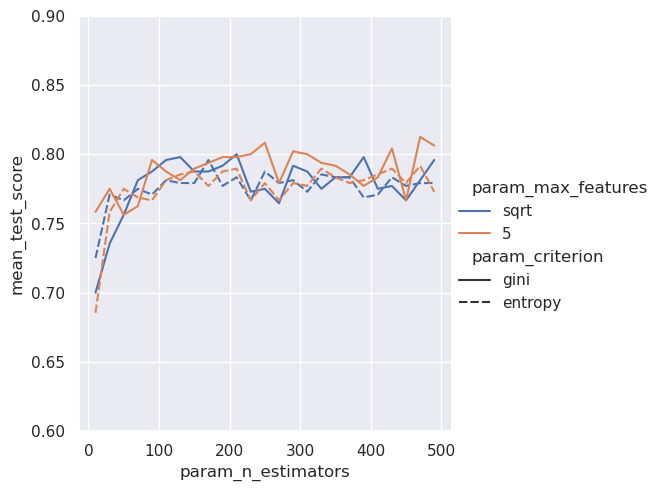

In [15]:
#plotting
print(rf_cv.best_score_)
print(rf_cv.best_params_)
sns.set_theme()
myplot = sns.relplot(data=rf_results, 
            x = rf_results["param_n_estimators"], 
            y = rf_results["mean_test_score"], 
            hue = rf_results["param_max_features"], 
            style = rf_results["param_criterion"], 
            kind = "line")
myplot.set(ylim=(0.60, 0.90))

In [16]:
# Dati per grafico Random Forest - tentativo 1

RAN_FOR = []

for i in range(50):
    # shuffling the dataframe
    df = df.sample(frac=1).reset_index()
    df = df.iloc[:, 1:17]   # needed to eliminate the old indexes column
    # separating y from x and eliminating specimen number variable
    X = df.iloc[:, 2:16]
    y = df.iloc[:, 0]
    clf_RF1 = cross_validate(RandomForestClassifier(n_estimators = n_estimators, criterion = criterion, max_features= max_features), X, y, cv=8, scoring = "balanced_accuracy", n_jobs = 5)
    scores_RF = np.mean(clf_RF1["test_score"])
    RAN_FOR.append(scores_RF)
print(RAN_FOR)
print(np.mean(RAN_FOR))

[0.7833333333333333, 0.7895833333333333, 0.7958333333333334, 0.7854166666666667, 0.8, 0.7729166666666667, 0.7895833333333334, 0.7770833333333333, 0.79375, 0.8020833333333333, 0.7791666666666667, 0.7708333333333334, 0.76875, 0.7958333333333334, 0.78125, 0.8020833333333334, 0.7854166666666667, 0.7833333333333333, 0.7791666666666667, 0.7979166666666667, 0.7854166666666668, 0.7729166666666667, 0.775, 0.7958333333333334, 0.79375, 0.7958333333333334, 0.8, 0.79375, 0.7958333333333333, 0.78125, 0.7916666666666667, 0.7937500000000001, 0.7791666666666667, 0.8020833333333334, 0.8104166666666667, 0.80625, 0.7833333333333333, 0.8, 0.80625, 0.7729166666666667, 0.7875, 0.7749999999999999, 0.7958333333333333, 0.7979166666666666, 0.79375, 0.7916666666666666, 0.7791666666666666, 0.7958333333333334, 0.8020833333333334, 0.7770833333333333]
0.7892916666666667


In [17]:
#timing

start_time_rf = time.time()
cross_validate(RandomForestClassifier(n_estimators = n_estimators, criterion = criterion, max_features= max_features), X, y, cv=8, scoring = "balanced_accuracy", n_jobs = 5)
stop_time_rf = time.time()
print("Process finished in %s seconds" % (stop_time_rf - start_time_rf))

{'fit_time': array([0.89708686, 0.89851999, 0.5876677 , 0.59166479, 0.60074472,
        0.61569619, 0.62016511, 0.61544108]),
 'score_time': array([0.04080796, 0.04058647, 0.02550173, 0.02493525, 0.02594614,
        0.02466154, 0.02533865, 0.02450585]),
 'test_score': array([0.78333333, 0.7       , 0.71666667, 0.76666667, 0.86666667,
        0.73333333, 0.81666667, 0.76666667])}

Process finished in 1.2750473022460938 seconds


In [18]:
#dati per grafico Random Forest - tentativo 2

#RF=[]

#for i in range(1, 6):
    #clf_RF2 = RandomForestClassifier(n_estimators = 700, criterion = "entropy", max_features = 5)
    #clf_RF2.fit(X_train,y_train)
    #predictions = clf_RF2.predict(X_test)
    #RF.append(accuracy_score(y_test, predictions))

#print(RF)

### SVM

In [30]:
# NON SERVE RUNNARE
# ho considerato i parametri riportati nell'ultima riga

# Grid Search - finding best estimators

# building the pipeline
pipe = Pipeline([('scaling', StandardScaler()),
                 ('SVM', svm.SVC(decision_function_shape='ovo'))])

# building the range of the regularization parameter (C) and of gamm
reg_param = np.logspace(-10, 11, 22)
gamm = np.logspace(-9, 3, 13)

grid_param = {'SVM__C': reg_param,
              'SVM__kernel': ('linear', 'poly', 'rbf', 'sigmoid'), 
              'SVM__degree': np.arange(2, 5),
              'SVM__decision_function_shape': ('ovo', 'ovr'),
              'SVM__gamma': gamm}

# shuffling the dataframe
df = df.sample(frac=1).reset_index()
df = df.iloc[:, 1:17]   # needed to eliminate the old indexes column
# separating y from x and eliminating specimen number variable
X = df.iloc[:, 2:16]
y = df.iloc[:, 0]

svm_cv = GridSearchCV(pipe, grid_param, cv=8, scoring='balanced_accuracy', n_jobs=5)
svm_cv.fit(X,y)

print(svm_cv.best_score_)  # result: 0.8104166666666666
print(svm_cv.best_params_) # result: {'SVM__C': 100000.0, 'SVM__decision_function_shape': 'ovo', 'SVM__degree': 2, 'SVM__gamma': 0.0001, 'SVM__kernel': 'rbf'}
SVM__C = svm_cv.best_params_["SVM__C"]
SVM__decision_function_shape = svm_cv.best_params_["SVM__decision_function_shape"]
SVM__degree = svm_cv.best_params_["SVM__degree"]
SVM__gamma = svm_cv.best_params_["SVM__gamma"]
SVM__kernel = svm_cv.best_params_["SVM__kernel"]

KeyboardInterrupt: 

In [20]:
# Dati per grafico SVM

SVM = []

pipe = Pipeline([('scaling', StandardScaler()),
                 ('SVM', svm.SVC( C= SVM__C, decision_function_shape = SVM__decision_function_shape, degree = SVM__degree, gamma = SVM__gamma, kernel = SVM__kernel))])

for i in range(50):
    # shuffling the dataframe
    df = df.sample(frac=1).reset_index()
    df = df.iloc[:, 1:17]   # needed to eliminate the old indexes column
    # separating y from x and eliminating specimen number variable
    X = df.iloc[:, 2:16]
    y = df.iloc[:, 0]
    clf_SVM1 = cross_validate(pipe, X, y, cv=8, scoring = "balanced_accuracy")
    scores_SVM1 = np.mean(clf_SVM1["test_score"])
    SVM.append(scores_SVM1)

print(SVM)
print(np.mean(SVM))

[0.7979166666666666, 0.7833333333333334, 0.7666666666666666, 0.78125, 0.8020833333333333, 0.7875, 0.7958333333333334, 0.7729166666666667, 0.7916666666666667, 0.7916666666666667, 0.79375, 0.8125, 0.7750000000000001, 0.78125, 0.7791666666666667, 0.7895833333333333, 0.7791666666666667, 0.7729166666666666, 0.7916666666666667, 0.7916666666666667, 0.79375, 0.7875000000000001, 0.7916666666666667, 0.7833333333333333, 0.8229166666666667, 0.8041666666666667, 0.7833333333333334, 0.7895833333333333, 0.7708333333333334, 0.7604166666666667, 0.79375, 0.7770833333333333, 0.79375, 0.78125, 0.7895833333333333, 0.7875000000000001, 0.7958333333333334, 0.7791666666666667, 0.7958333333333334, 0.7854166666666667, 0.78125, 0.7812500000000001, 0.8062499999999999, 0.8020833333333334, 0.7958333333333334, 0.8229166666666667, 0.7916666666666667, 0.7749999999999999, 0.7958333333333333, 0.7916666666666667]
0.7889583333333333


In [21]:
#timing

start_time_svm = time.time()
cross_validate(pipe, X, y, cv=8, scoring = "balanced_accuracy")
stop_time_svm = time.time()
print("Process finished in %s seconds" % (stop_time_svm - start_time_svm))

{'fit_time': array([0.010427  , 0.00875568, 0.00653386, 0.00754738, 0.00659299,
        0.00687647, 0.00650239, 0.00677562]),
 'score_time': array([0.00282645, 0.0023253 , 0.00156188, 0.00186658, 0.00177312,
        0.00167322, 0.00182986, 0.00166011]),
 'test_score': array([0.85      , 0.8       , 0.71666667, 0.85      , 0.8       ,
        0.76666667, 0.76666667, 0.78333333])}

Process finished in 0.08098793029785156 seconds


### Naive bayes

In [22]:
# No grid search since we don't have any hyper-parameters to choose

# shuffling the dataframe
df = df.sample(frac=1).reset_index()
df = df.iloc[:, 1:17]   # needed to eliminate the old indexes column
# separating y from x and eliminating specimen number variable
X = df.iloc[:, 2:16]
y = df.iloc[:, 0]

In [23]:
# Dati per grafico Naive Bayes

# k-fold cross validation

NB = []

for i in range(50):
    # shuffling the dataframe
    df = df.sample(frac=1).reset_index()
    df = df.iloc[:, 1:17]   # needed to eliminate the old indexes column
    # separating y from x and eliminating specimen number variable
    X = df.iloc[:, 2:16]
    y = df.iloc[:, 0]
    effect_NB_cv = cross_validate(GaussianNB(), X, y, cv= 8, scoring='balanced_accuracy')
    scores_NB1 = np.mean(effect_NB_cv["test_score"])
    NB.append(scores_NB1)
    
print(NB)
print(np.mean(NB))

[0.7270833333333333, 0.7395833333333334, 0.7333333333333334, 0.7354166666666666, 0.7333333333333334, 0.7374999999999999, 0.7166666666666668, 0.7354166666666666, 0.7229166666666667, 0.7354166666666666, 0.74375, 0.7395833333333334, 0.7229166666666667, 0.73125, 0.7020833333333333, 0.7458333333333333, 0.71875, 0.7458333333333333, 0.7354166666666666, 0.7375, 0.7333333333333334, 0.7416666666666667, 0.7354166666666666, 0.7333333333333333, 0.7416666666666666, 0.7416666666666667, 0.71875, 0.7416666666666667, 0.7458333333333333, 0.7291666666666667, 0.7354166666666667, 0.7479166666666667, 0.7395833333333334, 0.7291666666666667, 0.7520833333333333, 0.7291666666666667, 0.74375, 0.7333333333333334, 0.73125, 0.7291666666666667, 0.7333333333333333, 0.7437499999999999, 0.7395833333333333, 0.6958333333333333, 0.74375, 0.7354166666666666, 0.7375, 0.7583333333333333, 0.7416666666666667, 0.7041666666666666]
0.7341250000000001


In [24]:
#timing

start_time_nb = time.time()
cross_validate(GaussianNB(), X, y, cv= 8, scoring='balanced_accuracy')
stop_time_nb = time.time()
print("Process finished in %s seconds" % (stop_time_nb - start_time_nb))


{'fit_time': array([0.00224257, 0.0018568 , 0.00175858, 0.00164461, 0.00161266,
        0.00271463, 0.00171494, 0.00148797]),
 'score_time': array([0.00204706, 0.00146008, 0.00137615, 0.00129676, 0.00198364,
        0.00177574, 0.00130939, 0.00122476]),
 'test_score': array([0.73333333, 0.75      , 0.61666667, 0.73333333, 0.68333333,
        0.63333333, 0.78333333, 0.7       ])}

Process finished in 0.03196573257446289 seconds


### KNN

In [25]:
# NON SERVE RUNNARE
# ho considerato i parametri riportati nell'ultima riga

# Grid Search - finding best estimators

# shuffling the dataframe
df = df.sample(frac=1).reset_index()
df = df.iloc[:, 1:17]   # needed to eliminate the old indexes column
# separating y from x and eliminating specimen number variable
X = df.iloc[:, 2:16]
y = df.iloc[:, 0]

# griglia dei parametri su cui fare la ricerca
grid_param_cv = {'n_neighbors': np.arange(1, 340-340//8), 'weights': ('uniform', 'distance')}

knn_cv = GridSearchCV(KNeighborsClassifier(), grid_param_cv, cv= 8, scoring='balanced_accuracy', return_train_score=False, verbose=0, n_jobs= 5)
knn_cv.fit(X, y)
print(knn_cv.best_score_)  # result: 0.6354166666666666
print(knn_cv.best_params_) # result: {'n_neighbors': 5, 'weights': 'distance'}
n_neighbors = knn_cv.best_params_["n_neighbors"]
weights = knn_cv.best_params_["weights"]

/home/pettepiero/local/envs/IML/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/pettepiero/local/envs/IML/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

GridSearchCV(cv=8, estimator=KNeighborsClassifier(), n_jobs=5,
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89...
       222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234,
       235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
       248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
       261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
       274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286,
       287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297]),
                         'weights': ('uniform', 'distance')},
             scoring='balanced_accuracy')

0.625
{'n_neighbors': 6, 'weights': 'distance'}


In [26]:
# Dati per grafico KNN

KNN = []

for i in range(50):
    # shuffling the dataframe
    df = df.sample(frac=1).reset_index()
    df = df.iloc[:, 1:17]   # needed to eliminate the old indexes column
    # separating y from x and eliminating specimen number variable
    X = df.iloc[:, 2:16]
    y = df.iloc[:, 0]
    clf_KNN1 = cross_validate(KNeighborsClassifier( n_neighbors = 5, weights = "distance"), X, y, cv=8, scoring = "balanced_accuracy", n_jobs = 5)
    scores_KNN1 = np.mean(clf_KNN1["test_score"])
    KNN.append(scores_KNN1)
print(KNN)
print(np.mean(KNN))

[0.6270833333333334, 0.6062500000000001, 0.625, 0.625, 0.6083333333333334, 0.6041666666666667, 0.61875, 0.6229166666666667, 0.6166666666666667, 0.6125, 0.6166666666666667, 0.6416666666666667, 0.6208333333333333, 0.64375, 0.625, 0.6187499999999999, 0.6229166666666667, 0.6145833333333333, 0.6208333333333333, 0.6458333333333334, 0.5958333333333334, 0.6354166666666667, 0.58125, 0.6291666666666667, 0.6229166666666666, 0.6166666666666667, 0.5979166666666667, 0.6125, 0.6291666666666667, 0.6000000000000001, 0.6208333333333333, 0.63125, 0.6333333333333333, 0.6041666666666667, 0.6104166666666666, 0.625, 0.6270833333333334, 0.6229166666666667, 0.6312500000000001, 0.61875, 0.625, 0.6104166666666667, 0.6020833333333333, 0.61875, 0.6270833333333334, 0.6312500000000001, 0.6208333333333333, 0.6229166666666667, 0.6291666666666667, 0.6395833333333334]
0.6202083333333334


In [27]:
#timing

start_time_knn = time.time()
cross_validate(KNeighborsClassifier( n_neighbors = 5, weights = "distance"), X, y, cv=8, scoring = "balanced_accuracy", n_jobs = 5)
stop_time_knn = time.time()
print("Process finished in %s seconds" % (stop_time_knn - start_time_knn))

{'fit_time': array([0.00222754, 0.002069  , 0.00217915, 0.00191569, 0.00228453,
        0.00147319, 0.00148535, 0.00133586]),
 'score_time': array([0.00327373, 0.00326967, 0.00195312, 0.00205421, 0.0032177 ,
        0.00190592, 0.0018115 , 0.00187469]),
 'test_score': array([0.55      , 0.65      , 0.58333333, 0.61666667, 0.75      ,
        0.56666667, 0.76666667, 0.63333333])}

Process finished in 0.015317678451538086 seconds


## Graphs

Text(0.5, 1.0, 'Weighted accuracy')

[Text(1, 0, 'Tree'),
 Text(2, 0, 'Random Forest'),
 Text(3, 0, 'SVM'),
 Text(4, 0, 'Naive Bayes'),
 Text(5, 0, 'KNN')]

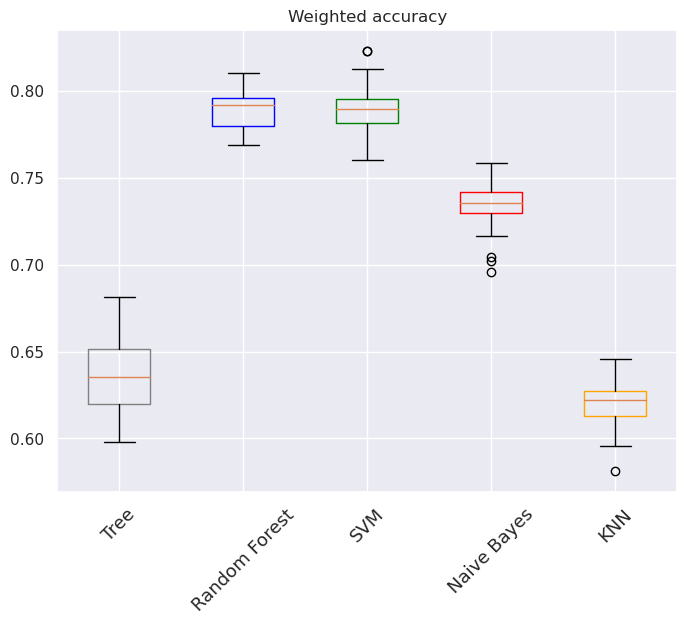

In [28]:
import matplotlib.pyplot as plt

scores_from_loop = [TREE, RAN_FOR, SVM, NB, KNN]
labels = ["Tree", "Random Forest", "SVM", "Naive Bayes", "KNN"]
colors = ['grey', 'blue', 'green', 'red', 'orange']

# Creating plot
fig, (ax) = plt.subplots(figsize=(8, 6), edgecolor= "blue")

bplot = ax.boxplot(scores_from_loop, 
                     vert=True,  # vertical box alignment
                     patch_artist=False,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax.set_title('Weighted accuracy')
ax.set_xticklabels(labels=labels, rotation = 45, fontsize=13)


for patch, color in zip(bplot['boxes'], colors):
    patch.set_color(color)

# show plot
plt.show()


modified version

[Text(1, 0, 'Tree'),
 Text(2, 0, 'Random Forest'),
 Text(3, 0, 'SVM'),
 Text(4, 0, 'Naive Bayes'),
 Text(5, 0, 'KNN')]

Text(0, 0.5, 'weighted accuracy')

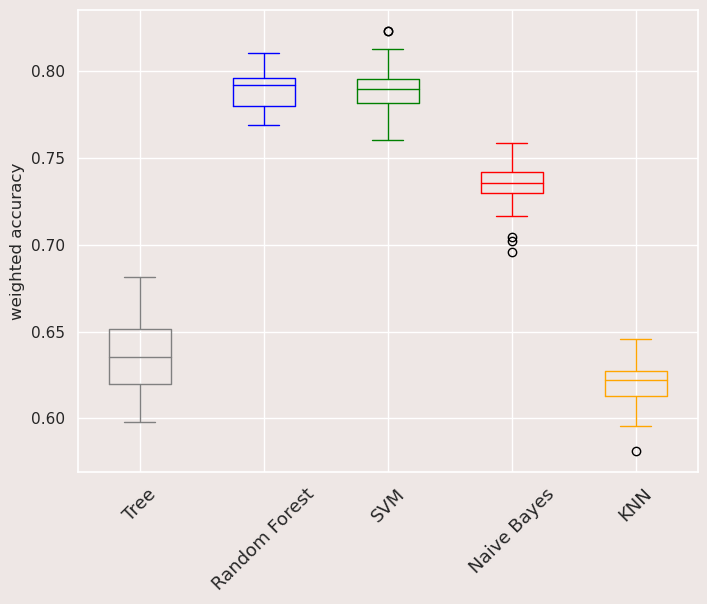

In [29]:
import matplotlib.pyplot as plt

# for fancier plots
sns.set_theme()
sns.set(rc={'axes.facecolor':'#eee7e5', 'figure.facecolor':'#eee7e5'})

scores_from_loop = [TREE, RAN_FOR, SVM, NB, KNN]
labels = ["Tree", "Random Forest", "SVM", "Naive Bayes", "KNN"]
colors = ['grey', 'blue', 'green', 'red', 'orange']
colors2 = ['grey', 'grey', 'blue', 'blue', 'green', 'green', 'red', 'red', 'orange', 'orange']

# Creating plot
fig, (ax) = plt.subplots(figsize=(8, 6), edgecolor= "blue")

bplot = ax.boxplot(scores_from_loop, 
                   vert=True,  # vertical box alignment
                   patch_artist=False,  # fill with color
                   labels=labels)  # will be used to label x-ticks
                   
dict_title = {'fontsize': 20, 'fontweight': 'bold'}
#ax.set_title('Weighted accuracy', fontdict=dict_title)
ax.set_xticklabels(labels=labels, rotation = 45, fontsize=13)
ax.set_ylabel('weighted accuracy')

for element in ['boxes', 'fliers', 'means', 'medians']:
    for patch, color in zip(bplot[element], colors):
        patch.set_color(color)

for element in ('whiskers', 'caps'):
    for patch, color in zip(bplot[element], colors2):
        patch.set_color(color)

# saving plot
plt.savefig('boxplot.png')

# show plot
plt.show()